Accuracy with default n_estimators (10): 1.0000
n_estimators: 20, Accuracy: 1.0000
n_estimators: 40, Accuracy: 1.0000
n_estimators: 60, Accuracy: 1.0000
n_estimators: 80, Accuracy: 1.0000
n_estimators: 100, Accuracy: 1.0000

Best accuracy: 1.0000 achieved with 1 trees


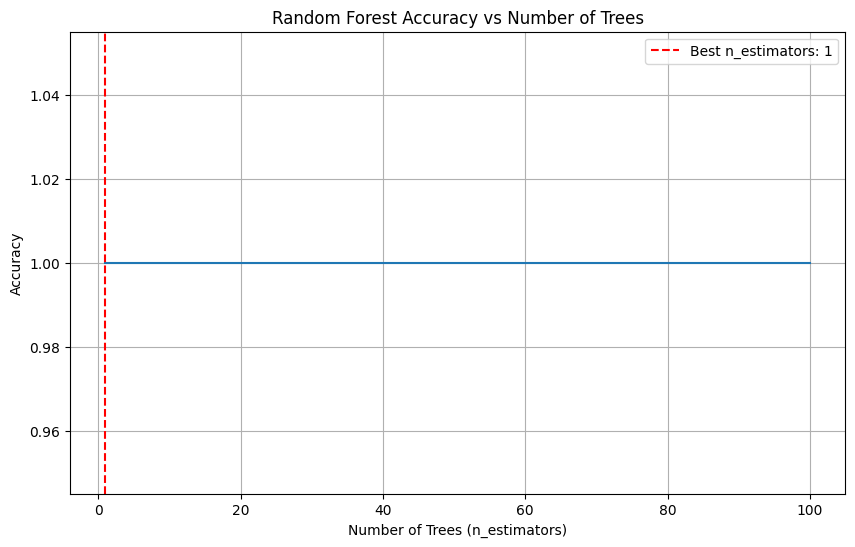

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
iris_data = pd.read_csv('/content/iris.csv')

# Prepare features and target
X = iris_data.drop('species', axis=1)
y = iris_data['species']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Build Random Forest classifier with default n_estimators (10)
rf_default = RandomForestClassifier(random_state=42)
rf_default.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred_default = rf_default.predict(X_test)
default_accuracy = accuracy_score(y_test, y_pred_default)

print(f"Accuracy with default n_estimators (10): {default_accuracy:.4f}")

# 2. Fine-tune the model by changing number of trees
n_estimators_list = range(1, 101)  # Testing from 1 to 100 trees
accuracy_scores = []

for n in n_estimators_list:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    if n % 20 == 0:  # Print progress every 20 trees
        print(f"n_estimators: {n}, Accuracy: {accuracy:.4f}")

# Find the best accuracy and corresponding n_estimators
best_accuracy = max(accuracy_scores)
best_n = n_estimators_list[accuracy_scores.index(best_accuracy)]

print(f"\nBest accuracy: {best_accuracy:.4f} achieved with {best_n} trees")

# Plot accuracy vs number of trees
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, accuracy_scores)
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs Number of Trees')
plt.axvline(x=best_n, color='r', linestyle='--', label=f'Best n_estimators: {best_n}')
plt.legend()
plt.grid(True)
plt.show()